In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [114]:
def speedup_plot(df, out_fn):
    eserial = min(df[df['name'] == 'earley_serial']['avg_time'])
    lserial = min(df[df['name'] == 'late_serial']['avg_time'])
    par_x = df[df['name'] == 'late_parallel']['threads'] 
    par_y = df[df['name'] == 'late_parallel']['avg_time'].as_matrix()

    fig, ax1 = plt.subplots()
    ax1.set_title('Speedup Over Serial Parsers')

    ax1.set_xlabel('Number of threads')
    ax1.set_xticks(np.arange(2, 22, 2))

    ax1.axvline(10, linestyle='dashed', color='purple')
    ax1.annotate('Number of cores', (10.4, 0.2), xycoords=('data', 'figure fraction'), color='purple')

    ax1.plot(par_x, lserial / par_y)
    ax1.set_ylabel('Speedup over serial Late algorithm')

    ax2 = ax1.twinx()
    ax2.plot(par_x, eserial / par_y, linestyle='None')
    ax2.set_ylabel('Speedup over serial Earley algorithm')
    
    fig.canvas.draw()
    ax1.set_yticklabels([l.get_text()+'x' for l in ax1.get_yticklabels()])
    ax2.set_yticklabels([l.get_text()+'x' for l in ax2.get_yticklabels()])

    plt.savefig(out_fn, dpi=300)
    plt.show()

In [116]:
dfs = []
for fn in glob('results/arith_per_item/*csv'):
    ambig = int(fn.split('-')[1].split('.')[0])
    df = pd.read_csv(fn)
    df['ambig'] = pd.Series([ambig]*len(df))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df = df.set_index('ambig')
df = df.sort_index()
df

ValueError: invalid literal for int() with base 10: 'ambig'

[20 20 20 20 20 20 20 20 20 20]
[ 0.0310868  0.0336361  0.0449529  0.0357051  0.147868   0.233131   0.605296
  2.19463    4.13586    9.03712  ]
[   30108    66499   145564   316260   682784  1466096  3133248  6668608
 14141440 29891328]


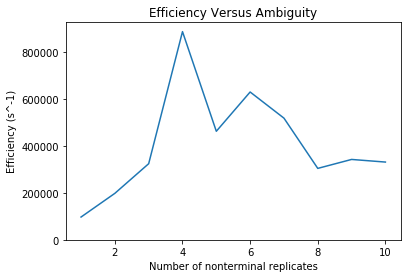

In [115]:
x = range(1, len(df)+1)

avg_time = df['avg_time'].as_matrix()
work = df['chart_size'].as_matrix()
threads = df['threads'].as_matrix()

print(threads)
print(avg_time)
print(work)

y = work/(np.minimum(threads, 10)*avg_time)

#y = (df['avg_time'] / df['chart_size'] * 10 * 1000000).as_matrix()

fig, ax = plt.subplots()
ax.set_title('Efficiency Versus Ambiguity')
ax.set_ylabel('Efficiency (s^-1)')
ax.set_xlabel('Number of nonterminal replicates')
plt.plot(x, y)
ax.set_ylim(bottom=0)
plt.savefig('../earley_paper/figures/per_item_time.png', dpi=300)
plt.show()

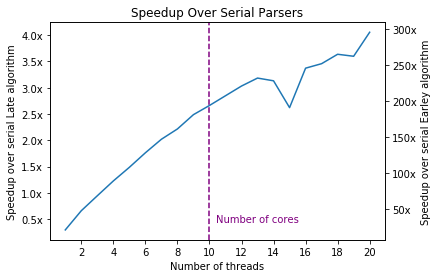

In [5]:
cgw_df = pd.read_csv('results/arith-strong-scaling.csv')
speedup_plot(cgw_df, '../earley_paper/figures/arith_scaling.png')

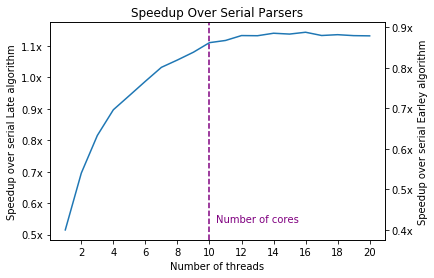

In [6]:
java_df = pd.read_csv('results/java-strong-scaling.csv')
speedup_plot(java_df, '../earley_paper/figures/java_scaling.png')

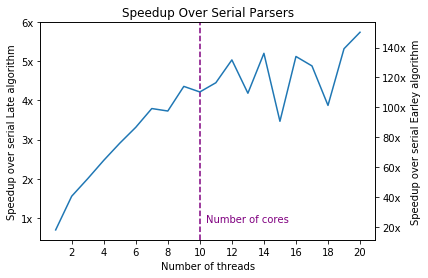

In [7]:
cgw_df = pd.read_csv('results/cgw-strong-scaling.csv')
speedup_plot(cgw_df, '../earley_paper/figures/cgw_scaling.png')

In [8]:
arith_weak_df = pd.read_csv('results/arith-weak-scaling.csv')
java_weak_df = pd.read_csv('results/java-weak-scaling.csv')
cgw_weak_df = pd.read_csv('results/cgw-weak-scaling.csv')

In [9]:
def weak_scaling_plot(df, out_fn):
    serial_avg_time = min(df[df['name'] == 'late_serial']['avg_time'])
    serial_work = min(df[df['name'] == 'late_serial']['chart_size'])
    avg_time = df[df['name'] == 'late_parallel']['avg_time'].as_matrix()
    work = df[df['name'] == 'late_parallel']['chart_size'].as_matrix()
    threads = df[df['name'] == 'late_parallel']['threads'].as_matrix()
    
    serial_efficiency = serial_work/serial_avg_time
    late_efficiency = work/(np.minimum(threads, 10)*avg_time)
        
    fig, ax1 = plt.subplots()
    ax1.set_title('Weak Scaling Efficiency (Increasing Sentence Length)')

    ax1.set_ylabel('Efficiency (% of linear scaling)')
    ax1.set_xlabel('Number of threads and relative problem size')
    ax1.set_xticks(np.arange(2, 22, 2))


    ax1.axvline(10, linestyle='dashed', color='purple')
    ax1.annotate('Number of cores', (10.4, 0.8), xycoords=('data', 'figure fraction'), color='purple')

    ax1.plot(threads, late_efficiency /serial_efficiency  * 100)
    ax1.set_ylim(bottom=0)
    
    fig.canvas.draw()

    plt.savefig(out_fn, dpi=300)
    plt.show()

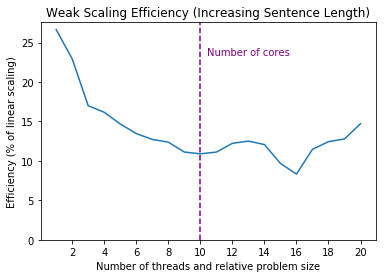

In [10]:
weak_scaling_plot(arith_weak_df, '../earley_paper/figures/arith-weak-scaling.png')

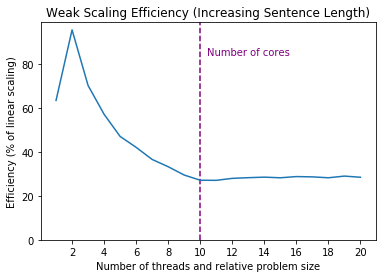

In [11]:
weak_scaling_plot(java_weak_df, '../earley_paper/figures/java-weak-scaling.png')

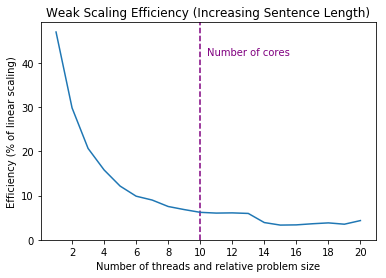

In [12]:
weak_scaling_plot(cgw_weak_df, '../earley_paper/figures/cgw-weak-scaling.png')

In [13]:
arith_weak_df['chart_size'] / 559

0      2650.218247
1      2650.218247
2      2650.218247
3      5296.314848
4      7958.898032
5     10659.033989
6     13320.243292
7     15983.284436
8     18665.101968
9     21371.191413
10    23991.642218
11    26629.037567
12    29286.583184
13    31955.119857
14    34650.676208
15    37342.568873
16    39995.992844
17    42668.651163
18    45349.094812
19    48025.416816
20    50718.683363
21    53449.044723
Name: chart_size, dtype: float64